In [1]:
# Data Source : https://archive.ics.uci.edu/ml/datasets/heart+disease
# Data Set : processed.cleveland.data

import csv
import urllib3
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns

In [66]:
# download data
# https://archive.ics.uci.edu/ml/datasets/heart+disease
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
http = urllib3.PoolManager()
response = http.request('GET', url)
soup = BeautifulSoup(response.data.decode('utf-8'))
# split and remove last empty list entry
data = str(soup).split("\n")[:-1]
# split by line
data = [string.split(",") for string in data]
df = pd.DataFrame(data, columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])
#data.head()
df.describe()

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: object


In [16]:
# Clean Data, by inspection we notice '?' for missing values

print((df[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]]=='?').any())
error = df.loc[(df['thal'] == '?') | (df['ca'] == '?')]
print(error)
df_clean = pd.concat([df,error]).drop_duplicates(keep=False)
# check
print((df_clean[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]]=='?').any())
df_clean = df_clean.astype(float)

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
num         False
dtype: bool
      age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
87   53.0  0.0  3.0    128.0  216.0  0.0     2.0   115.0   0.0     0.0   1.0   
166  52.0  1.0  3.0    138.0  223.0  0.0     0.0   169.0   0.0     0.0   1.0   
192  43.0  1.0  4.0    132.0  247.0  1.0     2.0   143.0   1.0     0.1   2.0   
266  52.0  1.0  4.0    128.0  204.0  1.0     0.0   156.0   1.0     1.0   2.0   
287  58.0  1.0  2.0    125.0  220.0  0.0     0.0   144.0   0.0     0.4   2.0   
302  38.0  1.0  3.0    138.0  175.0  0.0     0.0   173.0   0.0     0.0   1.0   

      ca thal num  
87   0.0    ?   0  
166    ?  3.0   0  
192    ?  7.0   1  
266  0.0    ?   2  
287    ?  7.0   0  
302    ?  3.0   0  
age         False
sex         False

In [18]:
df_clean.age = df_clean.age.astype(float).astype(int)
# age distribution over all samples
age = df_clean.groupby(['age']).size()
# age distribution over all sorted ascending
age_sorted = df_clean.groupby(['age']).size().sort_values(ascending=False)
# gender distribution
gender = df_clean.groupby(['sex']).size().sort_values(ascending=False)
# select men subset
men = df_clean[df_clean.sex == 1.0]
print("Total Men: ", men.size)
# men age distribution
men_c = men.groupby(['age']).size()
# select women subset & women age distribution#
women = df_clean[df_clean.sex == 0.0]
print("Total Women: ",women.size)
women_c = women.groupby(['age']).size()

Total Men:  2814
Total Women:  1344


<AxesSubplot:title={'center':'Age Distribution Men (2814)'}, xlabel='age'>

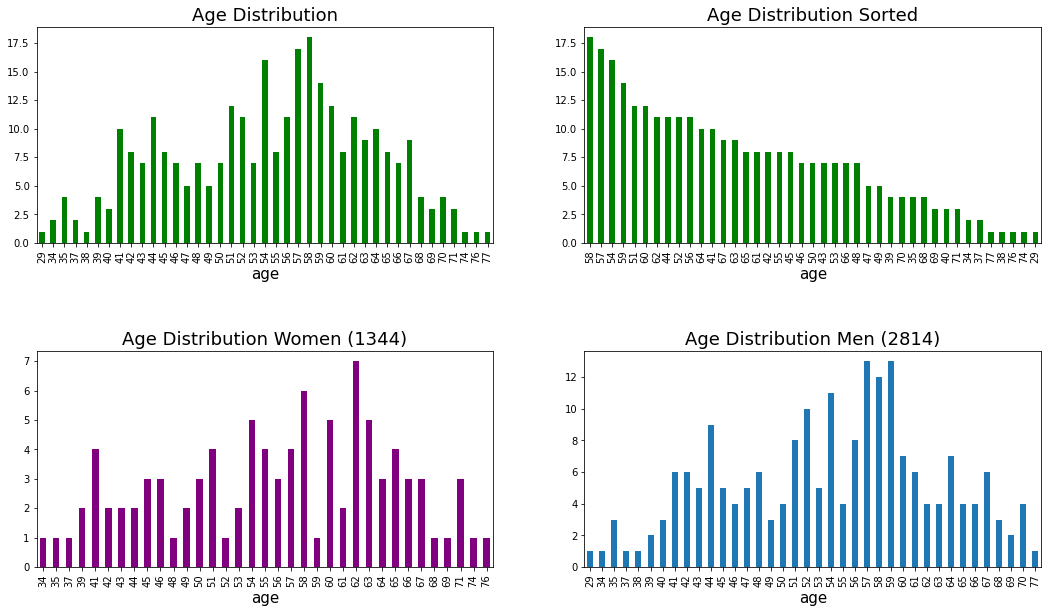

In [69]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(left=None, bottom=None, right=None, top=2.0, hspace=.5)
matplotlib.rcParams.update({'font.size': 15,'xtick.labelsize':10, 'ytick.labelsize':10})
age.plot(ax=axs[0,0],title='Age Distribution',kind='bar',figsize=(18,4),color='green')
age_sorted.plot(ax=axs[0,1], title='Age Distribution Sorted',kind='bar',color='green')
women_c.plot(ax=axs[1,0], title='Age Distribution Women (1344)',kind='bar',color='purple')
men_c.plot(ax=axs[1,1], title='Age Distribution Men (2814)',kind='bar')


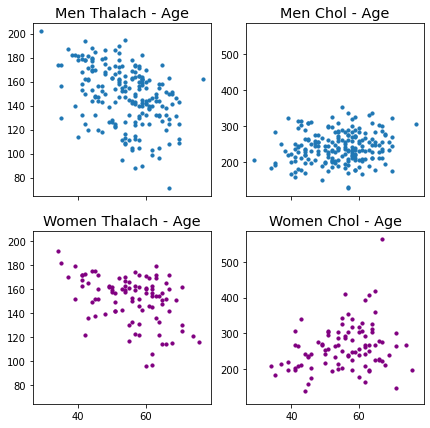

In [60]:
fig.subplots_adjust(left=None, bottom=None, right=None, top=2.0, hspace=.5)
matplotlib.rcParams.update({'font.size': 12,'xtick.labelsize':10, 'ytick.labelsize':10, 'figure.figsize':(7,7)})
fig, axs = plt.subplots(2, 2, sharex='col', sharey='col')
axs[0, 0].scatter(x=men.age, y=men.thalach, s=10)
axs[0,0].title.set_text('Men Thalach - Age')
axs[0, 1].scatter(x=men.age, y=men.chol, s=10)
axs[0,1].title.set_text('Men Chol - Age')
axs[1, 0].scatter(x=women.age,y=women.thalach, color='purple', s=10)
axs[1,0].title.set_text('Women Thalach - Age')
axs[1, 1].scatter(x=women.age, y=women.chol, color='purple', s=10)
axs[1,1].title.set_text('Women Chol - Age')
plt.show()

             variance        mean  median
age         81.897716   54.542088    56.0
sex          0.219492    0.676768     1.0
cp           0.930954    3.158249     3.0
trestbps   315.517290  131.693603   130.0
chol      2703.748589  247.350168   243.0
fbs          0.124238    0.144781     0.0
restecg      0.989853    0.996633     1.0
thalach    526.315270  149.599327   153.0
exang        0.220675    0.326599     0.0
oldpeak      1.359842    1.055556     0.8
slope        0.382155    1.602694     2.0
ca           0.881654    0.676768     0.0
thal         3.758281    4.730640     3.0
num          1.524115    0.946128     0.0


<AxesSubplot:>

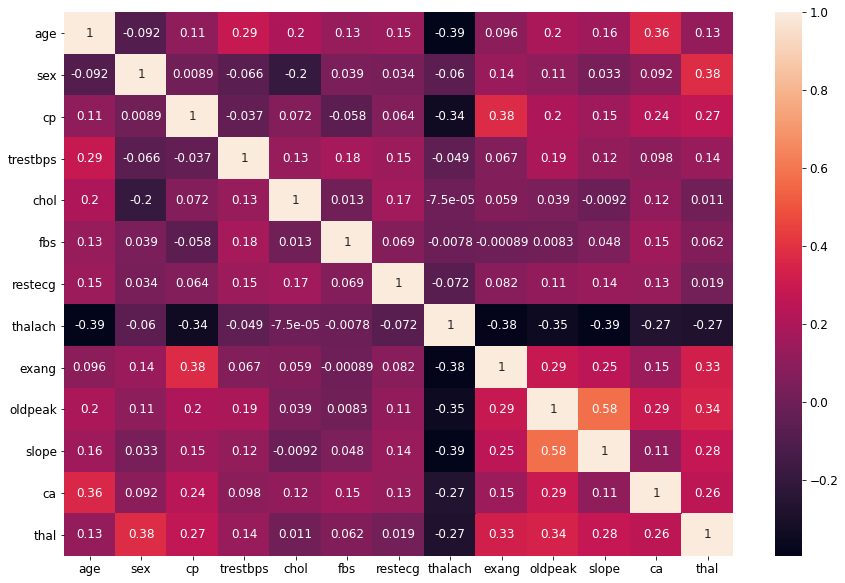

In [65]:
# Basic Statistics
stats = pd.concat([df_clean.var(), df_clean.mean(), df_clean.median()], keys=['variance', 'mean','median'], axis=1)
print(stats)

# Correlation
corr = df_clean.drop(['num'],axis=1).corr()
fig, ax = plt.subplots(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 12,'xtick.labelsize':12, 'ytick.labelsize':12})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,ax=ax)


<AxesSubplot:title={'center':"Correlation with target feature 'num'"}>

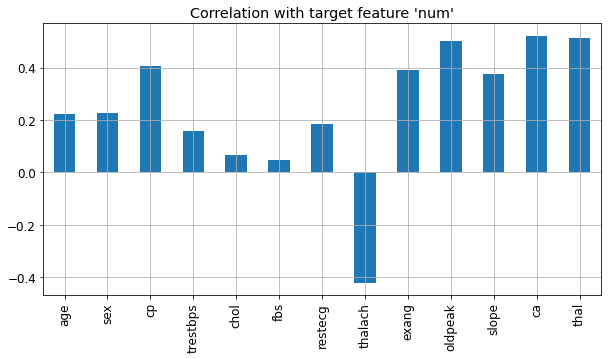

In [64]:
df_clean.drop(['num'], axis=1).corrwith(df_clean['num']).plot(kind='bar', grid=True,figsize=(10, 5), title="Correlation with target feature 'num'")
